# Loan Project

<img src = 'Screenshot%202023-08-07%20153245.png'>

### Import libraries

In [525]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import time
import random
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from iso639 import languages
import user_agents
from ip2geotools.databases.noncommercial import DbIpCity as ip2geo
import requests
import json
from geopy.distance import great_circle
from geopy.geocoders import Nominatim
from datasist.structdata import detect_outliers
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder 
from datetime import datetime
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler 
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import r2_score , mean_squared_error , classification_report ,recall_score , precision_score , ConfusionMatrixDisplay , confusion_matrix
from sklearn.linear_model import Ridge , Lasso
from sklearn.tree import DecisionTreeRegressor , DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor , RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB , GaussianNB , BernoulliNB
from sklearn.svm import SVC , SVR
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier
import xgboost as xgb
%matplotlib inline


### Load dataset

In [526]:
#import data
df=pd.read_csv('train_ctrUa4K.csv')
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
280,LP001910,Male,No,1,Not Graduate,Yes,4053,2426.0,158.0,360.0,0.0,Urban,N
243,LP001807,Male,Yes,2,Graduate,Yes,6250,1300.0,108.0,360.0,1.0,Rural,Y
197,LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
454,LP002453,Male,No,0,Graduate,Yes,7085,0.0,84.0,360.0,1.0,Semiurban,Y


### data overview

In [527]:
#cleansing
#investing
df.shape

(614, 13)

In [528]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


### EDA Univariate analysis

In [529]:
df.describe(include='O').T

,count,unique,top,freq
Loan_ID,614,614,LP001002,1
Gender,601,2,Male,489
Married,611,2,Yes,398
Dependents,599,4,0,345
Education,614,2,Graduate,480
Self_Employed,582,2,No,500
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


In [530]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,614,614,LP001002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,601,2,Male,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,611,2,Yes,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,599,4,0,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,582,2,No,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614.0,NaN,NaN,NaN,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.0,81000.0
CoapplicantIncome,614.0,NaN,NaN,NaN,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,NaN,NaN,NaN,146.412162,85.587325,9.0,100.0,128.0,168.0,700.0
Loan_Amount_Term,600.0,NaN,NaN,NaN,342.0,65.12041,12.0,360.0,360.0,360.0,480.0


### EDA Bivariate Analysis

In [531]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [532]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [533]:
#check duplicates
df.duplicated().sum()

0

In [534]:
#check missing value
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [535]:
df.dropna(inplace=True)
df.info()
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
476,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
477,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
478,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [536]:
#check columns
#rename columns
df.columns=df.columns.str.lower().str.strip().str.replace(" ","_")
df.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [537]:
#drop unnecessary columns
#no need for loan in prediction phase
df.drop('loan_id',axis=1,inplace=True)

In [538]:
#check and fix data type
df.dtypes

gender                object
married               object
dependents            object
education             object
self_employed         object
applicantincome        int64
coapplicantincome    float64
loanamount           float64
loan_amount_term     float64
credit_history       float64
property_area         object
loan_status           object
dtype: object

In [539]:
df['dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: dependents, dtype: int64

In [540]:
def fix_dep(x):
    return int(x[0])
df['dependents']=df['dependents'].apply(fix_dep)

In [541]:
df.dtypes

gender                object
married               object
dependents             int64
education             object
self_employed         object
applicantincome        int64
coapplicantincome    float64
loanamount           float64
loan_amount_term     float64
credit_history       float64
property_area         object
loan_status           object
dtype: object

In [542]:
df['applicantincome']=df['applicantincome'].astype('float64')

In [543]:
df.dtypes

gender                object
married               object
dependents             int64
education             object
self_employed         object
applicantincome      float64
coapplicantincome    float64
loanamount           float64
loan_amount_term     float64
credit_history       float64
property_area         object
loan_status           object
dtype: object

In [544]:
df['credit_history']=df['credit_history'].astype('int64')

In [545]:
df.dtypes

gender                object
married               object
dependents             int64
education             object
self_employed         object
applicantincome      float64
coapplicantincome    float64
loanamount           float64
loan_amount_term     float64
credit_history         int64
property_area         object
loan_status           object
dtype: object

In [546]:
#check rows
df.describe().T

,count,mean,std,min,25%,50%,75%,max
dependents,480.0,0.777083,1.020815,0.0,0.00,0.0,2.00,3.0
applicantincome,480.0,5364.231250,5668.251251,150.0,2898.75,3859.0,5852.50,81000.0
coapplicantincome,480.0,1581.093583,2617.692267,0.0,0.00,1084.5,2253.25,33837.0
loanamount,480.0,144.735417,80.508164,9.0,100.00,128.0,170.00,600.0
loan_amount_term,480.0,342.050000,65.212401,36.0,360.00,360.0,360.00,480.0
credit_history,480.0,0.854167,0.353307,0.0,1.00,1.0,1.00,1.0


In [547]:
#feature engineering extraction
df['totalincome']=df['applicantincome']+df['coapplicantincome']
df

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status,totalincome
0,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1,Rural,N,6091.0
1,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1,Urban,Y,3000.0
2,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1,Urban,Y,4941.0
3,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1,Urban,Y,6000.0
4,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360.0,1,Urban,Y,9613.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1,Rural,Y,2900.0
476,Male,Yes,3,Graduate,No,4106.0,0.0,40.0,180.0,1,Rural,Y,4106.0
477,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1,Urban,Y,8312.0
478,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1,Urban,Y,7583.0


In [548]:
lst=['totalincome','applicantincome','coapplicantincome']
for i in lst :
    df[i]=df[i].astype('int64')
df.dtypes    

gender                object
married               object
dependents             int64
education             object
self_employed         object
applicantincome        int64
coapplicantincome      int64
loanamount           float64
loan_amount_term     float64
credit_history         int64
property_area         object
loan_status           object
totalincome            int64
dtype: object

In [549]:
#no string operation , datatime feature , web data user nor geo spatial feature

In [550]:
#unique id
for i in df.columns :
    print(f'for {i} : \n',df[i].value_counts())
    print()
    print('-'*30)

for gender : 
 Male      394
Female     86
Name: gender, dtype: int64

------------------------------
for married : 
 Yes    311
No     169
Name: married, dtype: int64

------------------------------
for dependents : 
 0    274
2     85
1     80
3     41
Name: dependents, dtype: int64

------------------------------
for education : 
 Graduate        383
Not Graduate     97
Name: education, dtype: int64

------------------------------
for self_employed : 
 No     414
Yes     66
Name: self_employed, dtype: int64

------------------------------
for applicantincome : 
 2500    7
4583    6
2600    5
6000    4
4166    4
       ..
3418    1
3975    1
3244    1
4408    1
7583    1
Name: applicantincome, Length: 405, dtype: int64

------------------------------
for coapplicantincome : 
 0       216
1666      5
2500      4
5625      3
2083      3
       ... 
1250      1
3021      1
983       1
1775      1
240       1
Name: coapplicantincome, Length: 232, dtype: int64

---------------------------

In [551]:
lst_pie=[]
lst_hist=[]
for i in df.columns:
    if df[i].nunique() <= 2 :
        lst_pie.append(i)
    else :
        lst_hist.append(i)
print(lst_pie)
print(lst_hist)

['gender', 'married', 'education', 'self_employed', 'credit_history', 'loan_status']
['dependents', 'applicantincome', 'coapplicantincome', 'loanamount', 'loan_amount_term', 'property_area', 'totalincome']


In [552]:
#univariate analysis
for i in lst_pie:
    print()
    fig=px.pie(data_frame=df,names=i,title=f'{i}')
    fig.update_layout(title_x=0.5)
    fig.show()
    print('-'*30)

------------------------------



------------------------------



------------------------------



------------------------------



------------------------------



------------------------------


In [553]:
for i in lst_hist:
    print()
    fig=px.histogram(df,i,title=f'{i}',color_discrete_sequence=['#B58B2E'],marginal='box',text_auto=True)
    fig.update_layout(title_x=0.5)
    fig.show()
    print("-------------------------------------------------------------------------------")

-------------------------------------------------------------------------------



-------------------------------------------------------------------------------



-------------------------------------------------------------------------------



-------------------------------------------------------------------------------



-------------------------------------------------------------------------------



-------------------------------------------------------------------------------



-------------------------------------------------------------------------------


In [554]:
#detect and handle outliers
lst_num=[]
for i in  df.select_dtypes('number'):
    lst_num.append(i)
lst_num    

['dependents',
 'applicantincome',
 'coapplicantincome',
 'loanamount',
 'loan_amount_term',
 'credit_history',
 'totalincome']

In [555]:
lst_num.remove('credit_history')
#detect
outliers=detect_outliers(df , 0 , lst_num)
#handle
df.drop(outliers,axis=0,inplace=True)

In [556]:
for i in lst_num:
    print()
    fig=px.histogram(df,i,title=f'{i}',color_discrete_sequence=['#B58B2E'],marginal='box',text_auto=True)
    fig.update_layout(title_x=0.5)
    fig.show()
    print("-------------------------------------------------------------------------------")

-------------------------------------------------------------------------------



-------------------------------------------------------------------------------



-------------------------------------------------------------------------------



-------------------------------------------------------------------------------



-------------------------------------------------------------------------------



-------------------------------------------------------------------------------


In [557]:
for i in lst_pie:
    print()
    fig=px.pie(data_frame=df,names=i,title=f'{i}')
    fig.update_layout(title_x=0.5)
    fig.show()
    print('-'*30)


------------------------------



------------------------------



------------------------------



------------------------------



------------------------------



------------------------------


In [558]:
for i in df.columns :
    if i  == 'loan_status':
        continue
    else :    
        print()
        fig=px.histogram(df,x=i,color='loan_status',title=f'type vs {i}')
        fig.update_layout(title_x=0.5)
        fig.show()
        print("-"*30)

------------------------------



------------------------------



------------------------------



------------------------------



------------------------------



------------------------------



------------------------------



------------------------------



------------------------------



------------------------------



------------------------------



------------------------------


In [559]:
#average income for people depen. in each living area
pd.pivot_table(data=df,columns='dependents',values='totalincome',index='property_area',aggfunc=np.mean)

dependents,0,1,2,3
property_area,,,,
Rural,5694.085714,5374.90000,6153.947368,5943.000000
Semiurban,5243.965909,5315.80000,5378.041667,6006.090909
Urban,4794.315789,5531.52381,5844.857143,4881.400000


In [560]:
fig=px.histogram(df,y='property_area',x='totalincome',color='dependents',text_auto=True,histfunc='avg')
fig.show()

In [561]:
#total income vs amount of loan
fig=px.histogram(df,x='totalincome',y='loanamount',title='income vs loan',text_auto=True,histfunc='avg')
fig.update_layout(title_x=0.5)
fig.show()

In [562]:
#total income vs amount of loan with acceptance or rejection of the loan
fig=px.histogram(df,x='totalincome',y='loanamount',title='income vs loan',color='loan_status',text_auto=True,histfunc='avg')
fig.update_layout(title_x=0.5)
fig.show()

<AxesSubplot:>

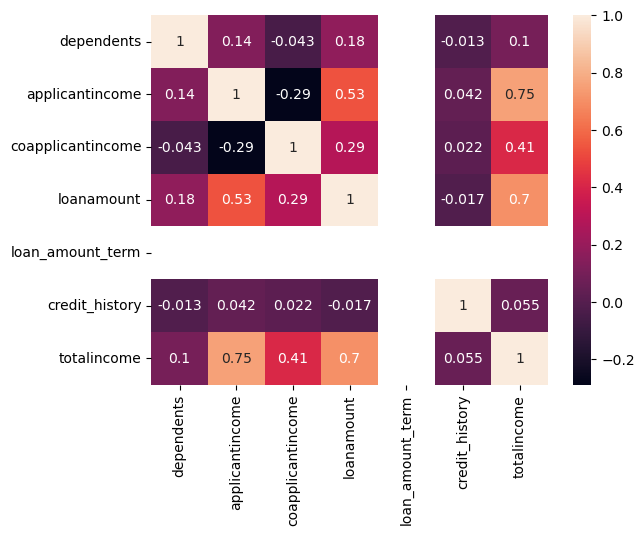

In [563]:
#correlation
sns.heatmap(df.select_dtypes('number').corr(), annot=True )

In [564]:
#drop un necessary features
df.drop(['applicantincome','coapplicantincome'],axis=1,inplace=True)

In [565]:
#encoding
#work with categorical data 
#check and decide the encoding stategy
#update objects list
lst_obj=[]
for i in df.select_dtypes('object') :
    lst_obj.append(i)
for i in lst_obj:
    print(f"for feature {i} : ",df[i].nunique())
    print()

for feature gender :  2

for feature married :  2

for feature education :  2

for feature self_employed :  2

for feature property_area :  3

for feature loan_status :  2



In [566]:
df_c=df.copy()
df_c.isna().sum()

gender              0
married             0
dependents          0
education           0
self_employed       0
loanamount          0
loan_amount_term    0
credit_history      0
property_area       0
loan_status         0
totalincome         0
dtype: int64

In [567]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356 entries, 0 to 479
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            356 non-null    object 
 1   married           356 non-null    object 
 2   dependents        356 non-null    int64  
 3   education         356 non-null    object 
 4   self_employed     356 non-null    object 
 5   loanamount        356 non-null    float64
 6   loan_amount_term  356 non-null    float64
 7   credit_history    356 non-null    int64  
 8   property_area     356 non-null    object 
 9   loan_status       356 non-null    object 
 10  totalincome       356 non-null    int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 33.4+ KB


In [568]:
#work with ordinal
lst_ordinal=['loan_status','married','education','self_employed']
for i in lst_ordinal :
    print(f'for {i} : \n',df_c[i].unique())
    print('-'*30) 

for loan_status : 
 ['N' 'Y']
------------------------------
for married : 
 ['Yes' 'No']
------------------------------
for education : 
 ['Graduate' 'Not Graduate']
------------------------------
for self_employed : 
 ['No' 'Yes']
------------------------------


In [569]:
dic_1={ 
'Y':1,
'N':0
}
dic_2={
'Yes':1,
'No':0
}
dic_3={
'Graduate' : 1,
'Not Graduate':0
}
dic_4={
'No':0,
'Yes':1
}
df_c['loan_status']=df_c['loan_status'].map(dic_1)
df_c['married']=df_c['married'].map(dic_2)
df_c['education']=df_c['education'].map(dic_3)
df_c['self_employed']=df_c['self_employed'].map(dic_4)
df_c

,gender,married,dependents,education,self_employed,loanamount,loan_amount_term,credit_history,property_area,loan_status,totalincome
0,Male,1,1,1,0,128.0,360.0,1,Rural,0,6091
1,Male,1,0,1,1,66.0,360.0,1,Urban,1,3000
2,Male,1,0,0,0,120.0,360.0,1,Urban,1,4941
3,Male,0,0,1,0,141.0,360.0,1,Urban,1,6000
4,Male,1,2,1,1,267.0,360.0,1,Urban,1,9613
...,...,...,...,...,...,...,...,...,...,...,...
474,Male,1,0,1,0,108.0,360.0,1,Rural,1,5182
475,Female,0,0,1,0,71.0,360.0,1,Rural,1,2900
477,Male,1,1,1,0,253.0,360.0,1,Urban,1,8312
478,Male,1,2,1,0,187.0,360.0,1,Urban,1,7583


In [570]:
#work with nominal
lst_small=['gender','property_area']
#create one hot enconding object
ohe = OneHotEncoder(sparse=False)
df_ohe = pd.DataFrame(ohe.fit_transform(df_c[lst_small]) , columns=ohe.get_feature_names_out())
df_ohe

,gender_Female,gender_Male,property_area_Rural,property_area_Semiurban,property_area_Urban
0,0.0,1.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
351,0.0,1.0,1.0,0.0,0.0
352,1.0,0.0,1.0,0.0,0.0
353,0.0,1.0,0.0,0.0,1.0
354,0.0,1.0,0.0,0.0,1.0


In [571]:
df_c.reset_index(drop=True, inplace=True)
df_ohe.reset_index(drop=True, inplace=True)
df_c=pd.concat([df_c,df_ohe],axis=1)
df_c.drop(lst_small ,axis=1,inplace=True)
df_c

,married,dependents,education,self_employed,loanamount,loan_amount_term,credit_history,loan_status,totalincome,gender_Female,gender_Male,property_area_Rural,property_area_Semiurban,property_area_Urban
0,1,1,1,0,128.0,360.0,1,0,6091,0.0,1.0,1.0,0.0,0.0
1,1,0,1,1,66.0,360.0,1,1,3000,0.0,1.0,0.0,0.0,1.0
2,1,0,0,0,120.0,360.0,1,1,4941,0.0,1.0,0.0,0.0,1.0
3,0,0,1,0,141.0,360.0,1,1,6000,0.0,1.0,0.0,0.0,1.0
4,1,2,1,1,267.0,360.0,1,1,9613,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,1,0,1,0,108.0,360.0,1,1,5182,0.0,1.0,1.0,0.0,0.0
352,0,0,1,0,71.0,360.0,1,1,2900,1.0,0.0,1.0,0.0,0.0
353,1,1,1,0,253.0,360.0,1,1,8312,0.0,1.0,0.0,0.0,1.0
354,1,2,1,0,187.0,360.0,1,1,7583,0.0,1.0,0.0,0.0,1.0


In [572]:
#check if there are no categorical data left
lst_obj_c=[]
for i in df_c.columns:
    if df_c[i].dtype == 'O':
        lst_obj_c.append(i)
print(lst_obj_c)  
if len(lst_obj_c) == 0 :
    print('There is no categorical data left')
else :
    print('There is categorical data left') 
    

[]
There is no categorical data left


In [573]:
#split data
x , y = df_c.drop(['loan_status'] , axis = 1 ) , df_c['loan_status']
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=0 , stratify=y)

In [574]:
x_train

,married,dependents,education,self_employed,loanamount,loan_amount_term,credit_history,totalincome,gender_Female,gender_Male,property_area_Rural,property_area_Semiurban,property_area_Urban
13,1,0,0,0,104.0,360.0,0,7660,0.0,1.0,0.0,0.0,1.0
6,1,3,1,0,158.0,360.0,0,5540,0.0,1.0,0.0,1.0,0.0
323,1,0,1,0,162.0,360.0,1,6556,0.0,1.0,0.0,1.0,0.0
122,1,3,0,1,130.0,360.0,1,5703,0.0,1.0,1.0,0.0,0.0
46,1,2,0,1,97.0,360.0,1,3750,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,1,1,1,0,158.0,360.0,1,6583,0.0,1.0,0.0,0.0,1.0
193,1,0,1,0,110.0,360.0,1,6784,1.0,0.0,0.0,0.0,1.0
322,1,3,1,1,260.0,360.0,1,10139,0.0,1.0,0.0,1.0,0.0
105,1,0,0,0,160.0,360.0,1,6033,0.0,1.0,0.0,0.0,1.0


In [575]:
x_test

,married,dependents,education,self_employed,loanamount,loan_amount_term,credit_history,totalincome,gender_Female,gender_Male,property_area_Rural,property_area_Semiurban,property_area_Urban
255,0,0,1,0,100.0,360.0,1,3750,0.0,1.0,0.0,0.0,1.0
118,0,0,1,0,127.0,360.0,1,3418,0.0,1.0,0.0,1.0,0.0
3,0,0,1,0,141.0,360.0,1,6000,0.0,1.0,0.0,0.0,1.0
63,1,1,1,0,100.0,360.0,1,4082,0.0,1.0,0.0,0.0,1.0
113,1,2,0,0,124.0,360.0,1,3917,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,0,0,0,0,133.0,360.0,1,6216,0.0,1.0,1.0,0.0,0.0
164,0,1,0,1,158.0,360.0,0,6479,0.0,1.0,0.0,0.0,1.0
172,1,2,1,0,127.0,360.0,0,4400,0.0,1.0,0.0,1.0,0.0
65,0,0,1,0,136.0,360.0,1,5316,0.0,1.0,0.0,0.0,1.0


In [576]:
y_train

13     0
6      0
323    1
122    1
46     1
      ..
319    1
193    0
322    1
105    0
107    1
Name: loan_status, Length: 284, dtype: int64

In [577]:
y_test

255    1
118    0
3      1
63     1
113    1
      ..
216    0
164    0
172    0
65     1
267    1
Name: loan_status, Length: 72, dtype: int64

In [578]:
#check the imbalancing classes
y_train.value_counts( )
px.pie(y_train,names=y_train)

In [579]:
#handle it with sampling
#create smote smapling object
sm = SMOTE(sampling_strategy={0 : 300})

In [580]:
#resampling
x_train , y_train= sm.fit_resample(x_train , y_train)

In [581]:
y_train.value_counts( )
px.pie(y_train,names=y_train)

In [582]:
#stadard scaling
#create standard scaler object
scaler = StandardScaler()
x_train[x_train.columns] = scaler.fit_transform(x_train)
x_test[x_test.columns] = scaler.transform(x_test)

In [587]:
#modeling ---> donot forget to scale before modeling
Models = [
    ('LR',LogisticRegression()),
    ('KNNC' , KNeighborsClassifier(n_neighbors=3)),
    ('GNB' , GaussianNB()),
    ('BNB' , BernoulliNB()),
    ('SVC' , SVC()),
    ('SVC Linear',SVC(kernel='linear' , C = 1)),
    ('SVC RBF',SVC(kernel='rbf' , gamma=0.1)),
    ('SVC POLY',SVC(kernel='poly' , degree=1)),
    ('DT' , DecisionTreeClassifier()),
    ('RF' , RandomForestClassifier()),
    ('ADB',AdaBoostClassifier()),
    ('GB',GradientBoostingClassifier()),
    ('XGB',xgb.XGBClassifier())
    
]

LR
Training set pred accuracy :  80.0 %
Test set  pred accuracy :  76.0 %
              precision    recall  f1-score   support

          No     0.8618    0.7900    0.8243       300
         Yes     0.7284    0.8164    0.7699       207

    accuracy                         0.8008       507
   macro avg     0.7951    0.8032    0.7971       507
weighted avg     0.8074    0.8008    0.8021       507

Classification report for training set : 
 None
              precision    recall  f1-score   support

          No     0.5714    0.6000    0.5854        20
         Yes     0.8431    0.8269    0.8350        52

    accuracy                         0.7639        72
   macro avg     0.7073    0.7135    0.7102        72
weighted avg     0.7677    0.7639    0.7656        72

Classification report for test set : 
 None
matrix for train : 



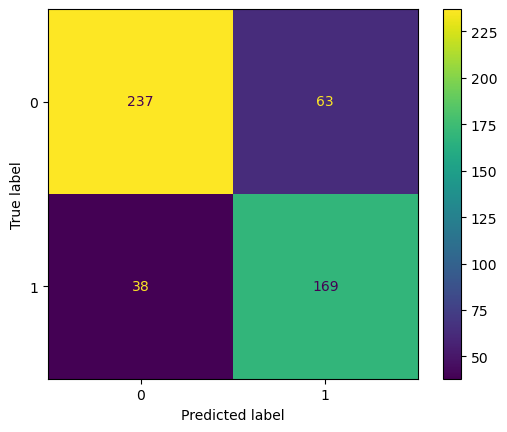

matrix for test : 



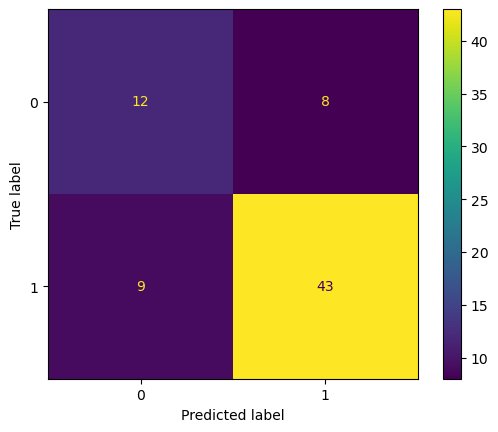

------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



KNNC
Training set pred accuracy :  91.0 %
Test set  pred accuracy :  72.0 %
              precision    recall  f1-score   support

          No     0.9205    0.9267    0.9236       300
         Yes     0.8927    0.8841    0.8883       207

    accuracy                         0.9093       507
   macro avg     0.9066    0.9054    0.9060       507
weighted avg     0.9092    0.9093    0.9092       507

Classification report for training set : 
 None
              precision    recall  f1-score   support

          No     0.5000    0.5000    0.5000        20
         Yes     0.8077    0.8077    0.8077        52

    accuracy                         0.7222        72
   macro avg     0.6538    0.6538    0.6538        72
weighted avg     0.7222    0.7222    0.7222        72

Classification report for test set : 
 None
matrix for train : 



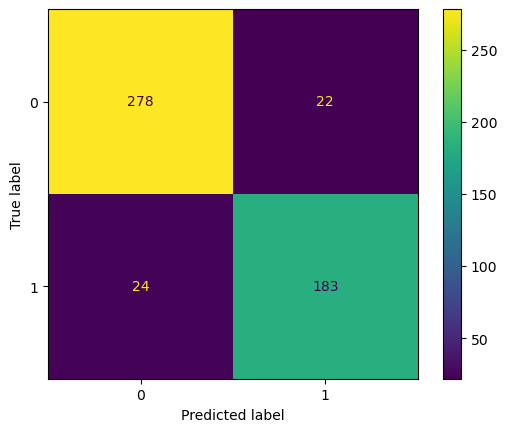

matrix for test : 



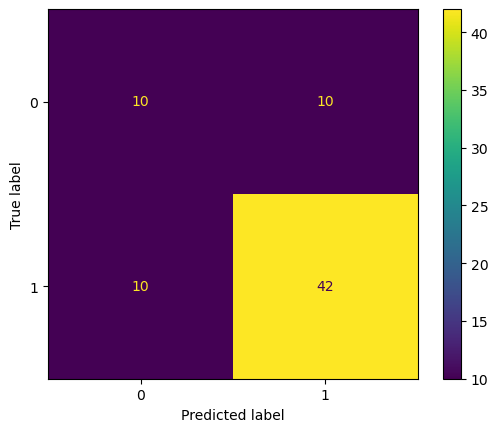

------------------------------
GNB
Training set pred accuracy :  78.0 %
Test set  pred accuracy :  82.0 %
              precision    recall  f1-score   support

          No     0.8593    0.7533    0.8028       300
         Yes     0.6967    0.8213    0.7539       207

    accuracy                         0.7811       507
   macro avg     0.7780    0.7873    0.7784       507
weighted avg     0.7929    0.7811    0.7829       507

Classification report for training set : 
 None
              precision    recall  f1-score   support

          No     0.6842    0.6500    0.6667        20
         Yes     0.8679    0.8846    0.8762        52

    accuracy                         0.8194        72
   macro avg     0.7761    0.7673    0.7714        72
weighted avg     0.8169    0.8194    0.8180        72

Classification report for test set : 
 None
matrix for train : 



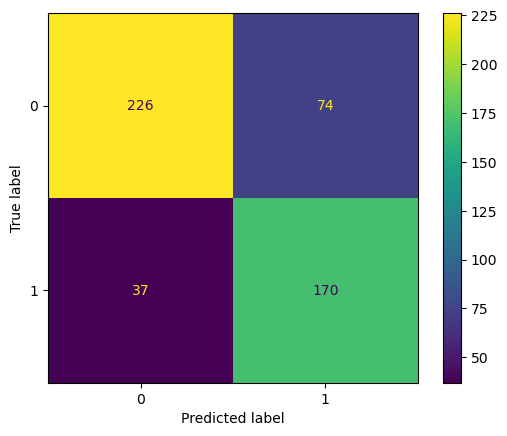

matrix for test : 



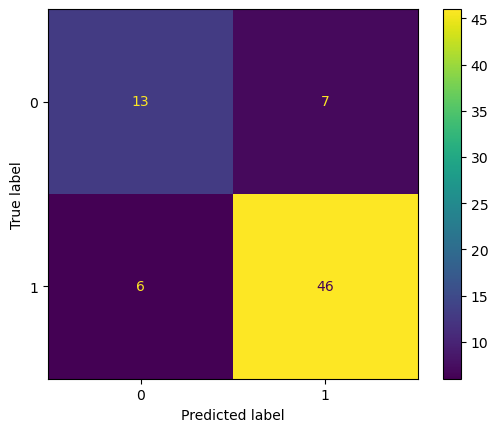

------------------------------
BNB
Training set pred accuracy :  79.0 %
Test set  pred accuracy :  81.0 %
              precision    recall  f1-score   support

          No     0.8577    0.7633    0.8078       300
         Yes     0.7042    0.8164    0.7562       207

    accuracy                         0.7850       507
   macro avg     0.7809    0.7899    0.7820       507
weighted avg     0.7950    0.7850    0.7867       507

Classification report for training set : 
 None
              precision    recall  f1-score   support

          No     0.6364    0.7000    0.6667        20
         Yes     0.8800    0.8462    0.8627        52

    accuracy                         0.8056        72
   macro avg     0.7582    0.7731    0.7647        72
weighted avg     0.8123    0.8056    0.8083        72

Classification report for test set : 
 None
matrix for train : 



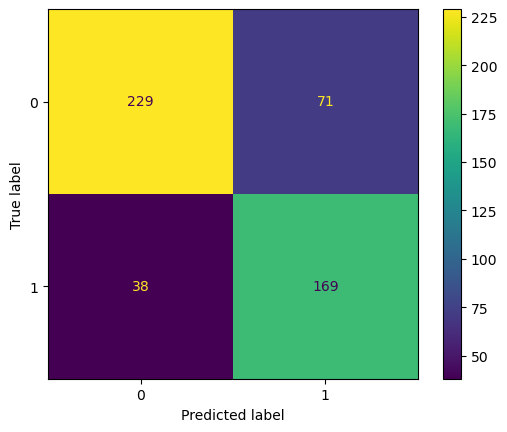

matrix for test : 



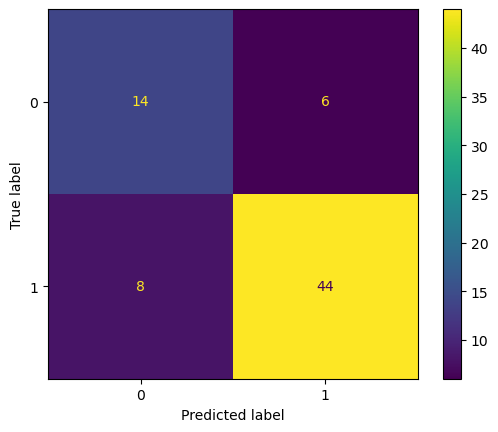

------------------------------
SVC
Training set pred accuracy :  86.0 %
Test set  pred accuracy :  79.0 %
              precision    recall  f1-score   support

          No     0.9349    0.8133    0.8699       300
         Yes     0.7724    0.9179    0.8389       207

    accuracy                         0.8560       507
   macro avg     0.8536    0.8656    0.8544       507
weighted avg     0.8685    0.8560    0.8572       507

Classification report for training set : 
 None
              precision    recall  f1-score   support

          No     0.6471    0.5500    0.5946        20
         Yes     0.8364    0.8846    0.8598        52

    accuracy                         0.7917        72
   macro avg     0.7417    0.7173    0.7272        72
weighted avg     0.7838    0.7917    0.7861        72

Classification report for test set : 
 None
matrix for train : 



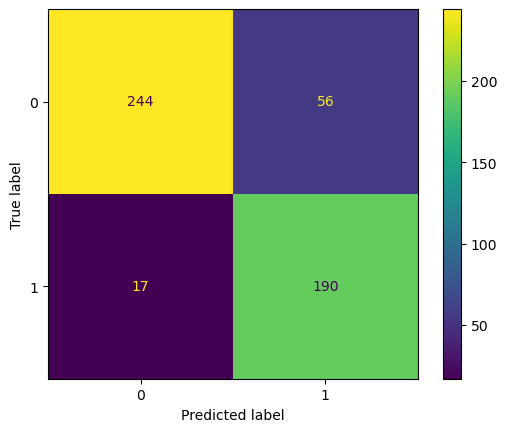

matrix for test : 



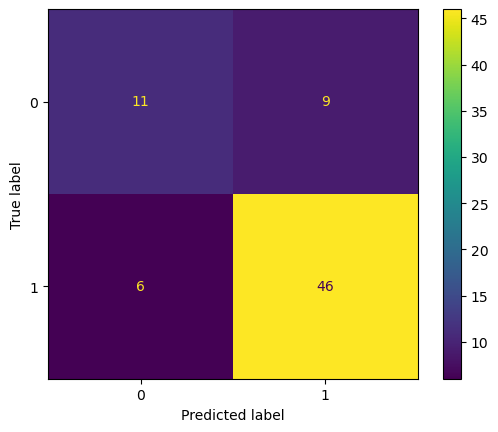

------------------------------
SVC Linear
Training set pred accuracy :  79.0 %
Test set  pred accuracy :  76.0 %
              precision    recall  f1-score   support

          No     0.8509    0.7800    0.8139       300
         Yes     0.7155    0.8019    0.7563       207

    accuracy                         0.7890       507
   macro avg     0.7832    0.7910    0.7851       507
weighted avg     0.7956    0.7890    0.7904       507

Classification report for training set : 
 None
              precision    recall  f1-score   support

          No     0.5714    0.6000    0.5854        20
         Yes     0.8431    0.8269    0.8350        52

    accuracy                         0.7639        72
   macro avg     0.7073    0.7135    0.7102        72
weighted avg     0.7677    0.7639    0.7656        72

Classification report for test set : 
 None
matrix for train : 



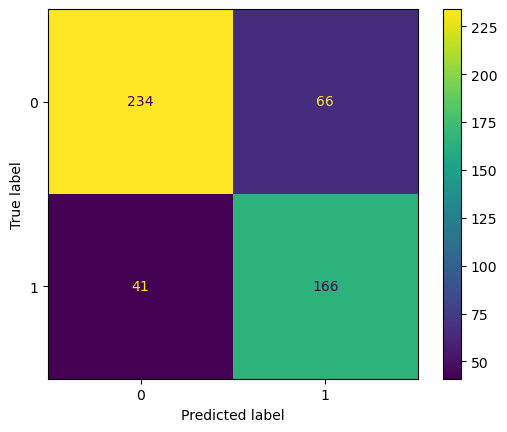

matrix for test : 



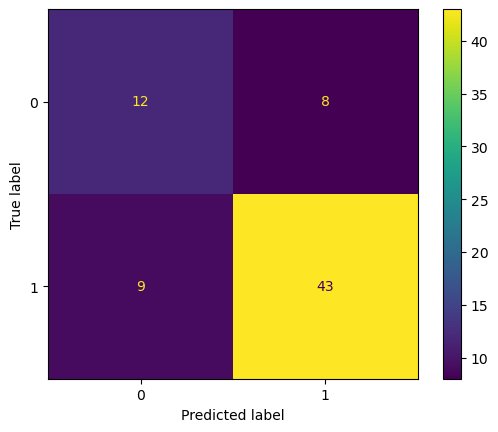

------------------------------
SVC RBF
Training set pred accuracy :  86.0 %
Test set  pred accuracy :  79.0 %
              precision    recall  f1-score   support

          No     0.9425    0.8200    0.8770       300
         Yes     0.7805    0.9275    0.8477       207

    accuracy                         0.8639       507
   macro avg     0.8615    0.8738    0.8623       507
weighted avg     0.8764    0.8639    0.8650       507

Classification report for training set : 
 None
              precision    recall  f1-score   support

          No     0.6471    0.5500    0.5946        20
         Yes     0.8364    0.8846    0.8598        52

    accuracy                         0.7917        72
   macro avg     0.7417    0.7173    0.7272        72
weighted avg     0.7838    0.7917    0.7861        72

Classification report for test set : 
 None
matrix for train : 



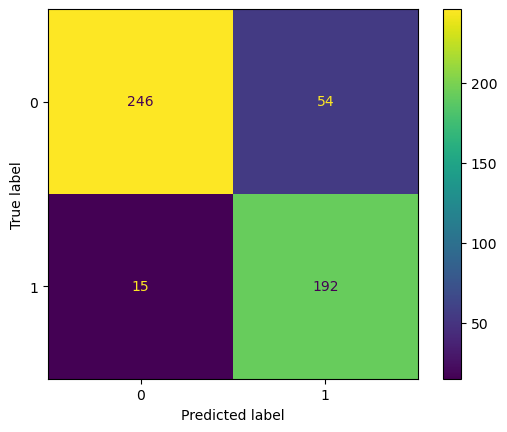

matrix for test : 



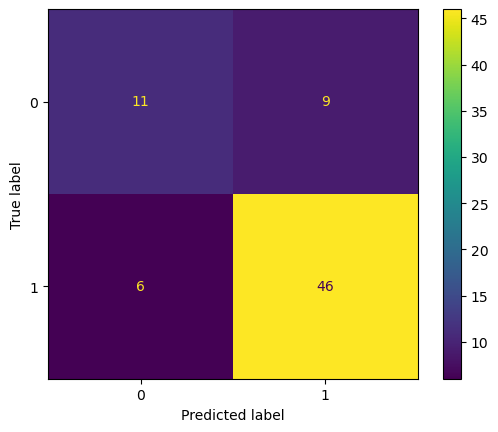

------------------------------
SVC POLY
Training set pred accuracy :  77.0 %
Test set  pred accuracy :  74.0 %
              precision    recall  f1-score   support

          No     0.8485    0.7467    0.7943       300
         Yes     0.6872    0.8068    0.7422       207

    accuracy                         0.7712       507
   macro avg     0.7679    0.7767    0.7683       507
weighted avg     0.7827    0.7712    0.7731       507

Classification report for training set : 
 None
              precision    recall  f1-score   support

          No     0.5217    0.6000    0.5581        20
         Yes     0.8367    0.7885    0.8119        52

    accuracy                         0.7361        72
   macro avg     0.6792    0.6942    0.6850        72
weighted avg     0.7492    0.7361    0.7414        72

Classification report for test set : 
 None
matrix for train : 



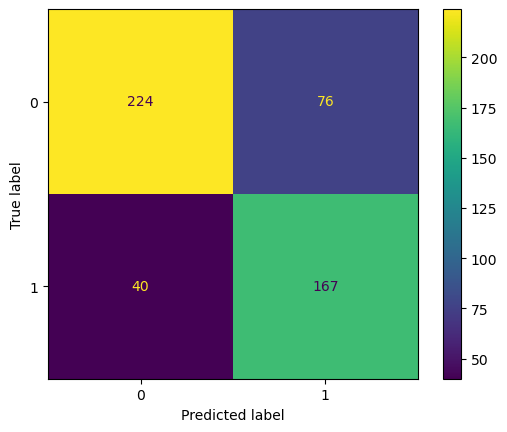

matrix for test : 



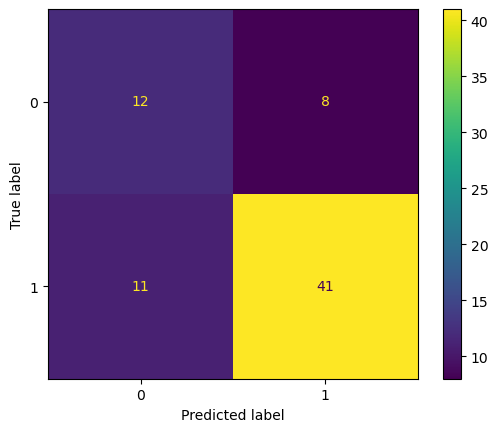

------------------------------
DT
Training set pred accuracy :  100.0 %
Test set  pred accuracy :  82.0 %
              precision    recall  f1-score   support

          No     1.0000    1.0000    1.0000       300
         Yes     1.0000    1.0000    1.0000       207

    accuracy                         1.0000       507
   macro avg     1.0000    1.0000    1.0000       507
weighted avg     1.0000    1.0000    1.0000       507

Classification report for training set : 
 None
              precision    recall  f1-score   support

          No     0.7333    0.5500    0.6286        20
         Yes     0.8421    0.9231    0.8807        52

    accuracy                         0.8194        72
   macro avg     0.7877    0.7365    0.7547        72
weighted avg     0.8119    0.8194    0.8107        72

Classification report for test set : 
 None
matrix for train : 



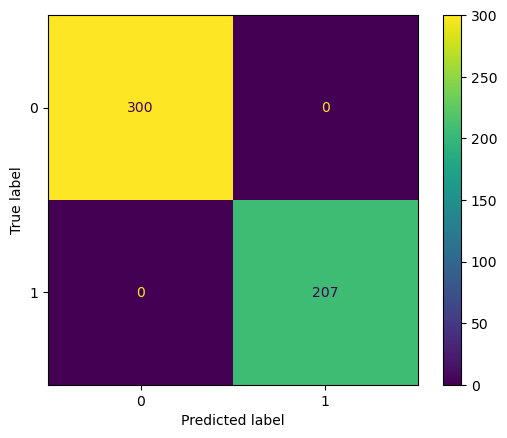

matrix for test : 



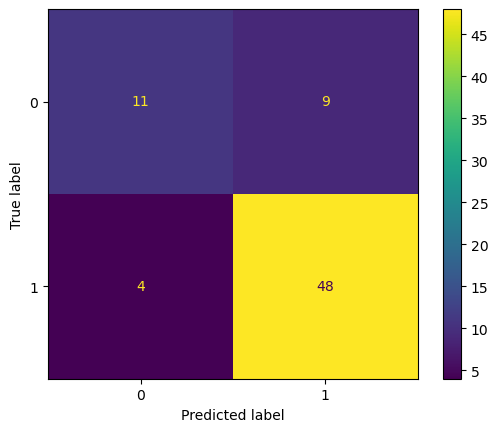

------------------------------
RF
Training set pred accuracy :  100.0 %
Test set  pred accuracy :  82.0 %
              precision    recall  f1-score   support

          No     1.0000    1.0000    1.0000       300
         Yes     1.0000    1.0000    1.0000       207

    accuracy                         1.0000       507
   macro avg     1.0000    1.0000    1.0000       507
weighted avg     1.0000    1.0000    1.0000       507

Classification report for training set : 
 None
              precision    recall  f1-score   support

          No     0.6842    0.6500    0.6667        20
         Yes     0.8679    0.8846    0.8762        52

    accuracy                         0.8194        72
   macro avg     0.7761    0.7673    0.7714        72
weighted avg     0.8169    0.8194    0.8180        72

Classification report for test set : 
 None
matrix for train : 



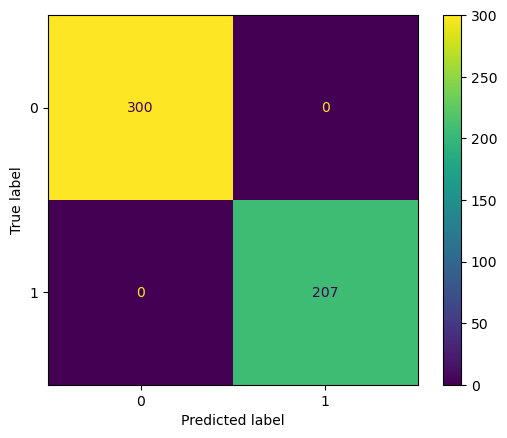

matrix for test : 



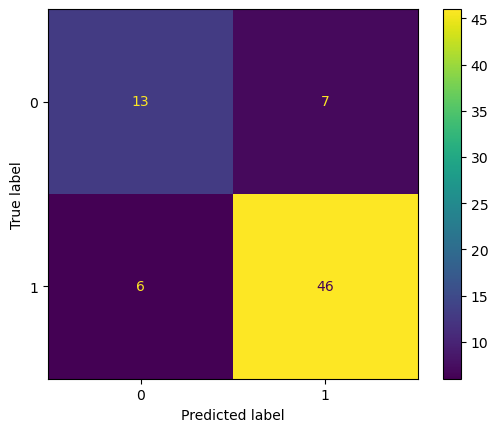

------------------------------
ADB
Training set pred accuracy :  89.0 %
Test set  pred accuracy :  82.0 %
              precision    recall  f1-score   support

          No     0.9489    0.8667    0.9059       300
         Yes     0.8283    0.9324    0.8773       207

    accuracy                         0.8935       507
   macro avg     0.8886    0.8995    0.8916       507
weighted avg     0.8997    0.8935    0.8942       507

Classification report for training set : 
 None
              precision    recall  f1-score   support

          No     0.7059    0.6000    0.6486        20
         Yes     0.8545    0.9038    0.8785        52

    accuracy                         0.8194        72
   macro avg     0.7802    0.7519    0.7636        72
weighted avg     0.8133    0.8194    0.8147        72

Classification report for test set : 
 None
matrix for train : 



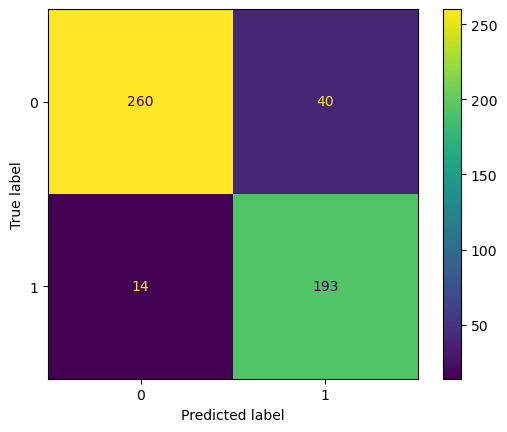

matrix for test : 



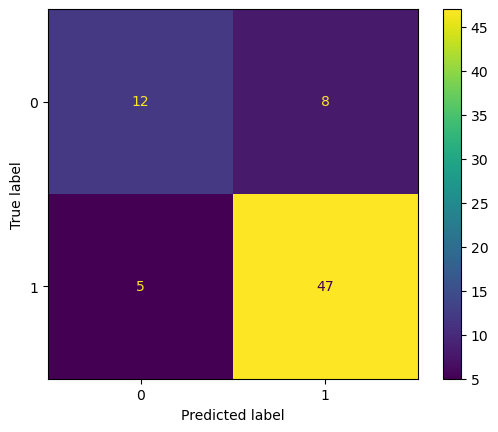

------------------------------
GB
Training set pred accuracy :  96.0 %
Test set  pred accuracy :  82.0 %
              precision    recall  f1-score   support

          No     0.9964    0.9300    0.9621       300
         Yes     0.9075    0.9952    0.9493       207

    accuracy                         0.9566       507
   macro avg     0.9520    0.9626    0.9557       507
weighted avg     0.9601    0.9566    0.9569       507

Classification report for training set : 
 None
              precision    recall  f1-score   support

          No     0.6842    0.6500    0.6667        20
         Yes     0.8679    0.8846    0.8762        52

    accuracy                         0.8194        72
   macro avg     0.7761    0.7673    0.7714        72
weighted avg     0.8169    0.8194    0.8180        72

Classification report for test set : 
 None
matrix for train : 



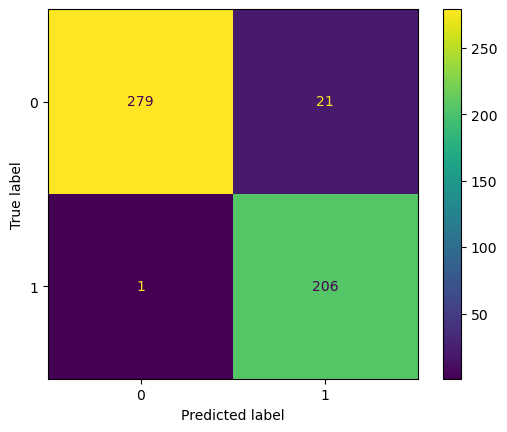

matrix for test : 



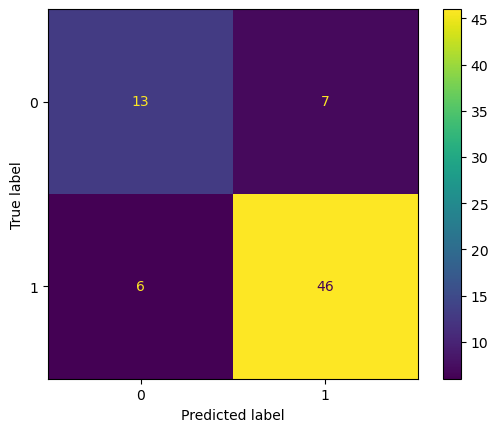

------------------------------
XGB
Training set pred accuracy :  100.0 %
Test set  pred accuracy :  76.0 %
              precision    recall  f1-score   support

          No     1.0000    0.9967    0.9983       300
         Yes     0.9952    1.0000    0.9976       207

    accuracy                         0.9980       507
   macro avg     0.9976    0.9983    0.9980       507
weighted avg     0.9980    0.9980    0.9980       507

Classification report for training set : 
 None
              precision    recall  f1-score   support

          No     0.5600    0.7000    0.6222        20
         Yes     0.8723    0.7885    0.8283        52

    accuracy                         0.7639        72
   macro avg     0.7162    0.7442    0.7253        72
weighted avg     0.7856    0.7639    0.7710        72

Classification report for test set : 
 None
matrix for train : 



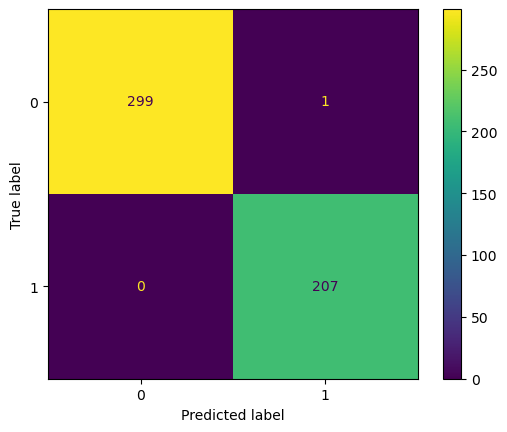

matrix for test : 



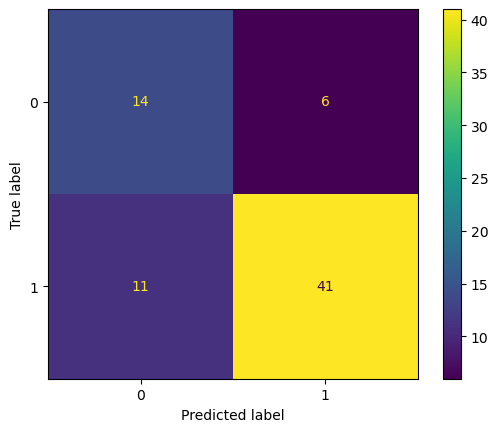

------------------------------


In [588]:
for model in Models:
    
    model[1].fit(x_train , y_train)
    
    y_train_pred = model[1].predict(x_train)
    y_test_pred = model[1].predict(x_test)
    train_acc = accuracy_score(y_true=y_train , y_pred=y_train_pred)
    test_acc = accuracy_score(y_true=y_test , y_pred=y_test_pred)
    print(model[0])
    print("Training set pred accuracy : ",np.around(train_acc,2)* 100,'%' )
    print("Test set  pred accuracy : ",np.around(test_acc,2)* 100,'%')
    print("Classification report for training set : \n",print(classification_report(y_true=y_train, y_pred=y_train_pred, target_names=['No','Yes'], digits=4)))
    print("Classification report for test set : \n",print(classification_report(y_true=y_test, y_pred=y_test_pred, target_names=['No','Yes'], digits=4)))
    print('matrix for train : \n')
    ConfusionMatrixDisplay(confusion_matrix(y_true=y_train , y_pred=y_train_pred)).plot()
    plt.show()
    print('matrix for test : \n')
    ConfusionMatrixDisplay(confusion_matrix(y_true=y_test , y_pred=y_test_pred)).plot()
    plt.show()
    print('-'*30)   

Training set pred accuracy :  80.0 %
Test set  pred accuracy :  76.0 %
              precision    recall  f1-score   support

          No     0.8618    0.7900    0.8243       300
         Yes     0.7284    0.8164    0.7699       207

    accuracy                         0.8008       507
   macro avg     0.7951    0.8032    0.7971       507
weighted avg     0.8074    0.8008    0.8021       507

Classification report for training set : 
 None
              precision    recall  f1-score   support

          No     0.5714    0.6000    0.5854        20
         Yes     0.8431    0.8269    0.8350        52

    accuracy                         0.7639        72
   macro avg     0.7073    0.7135    0.7102        72
weighted avg     0.7677    0.7639    0.7656        72

Classification report for test set : 
 None
matrix for train : 



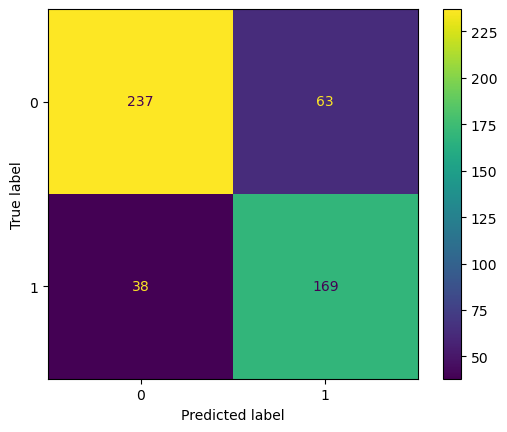

matrix for test : 



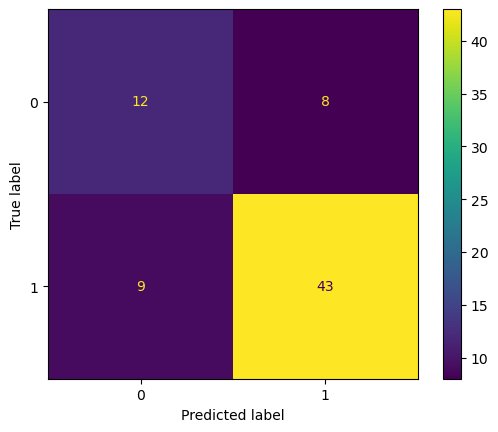

------------------------------


In [589]:
#model 14 --- > polynomial regression with classification
#create polynomial regression object
poly = PolynomialFeatures(degree=2)
#Standarization
#create standard scaler object
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
lr = LogisticRegression(multi_class='ovr' , max_iter=2000)
lr.fit(x_train , y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
train_acc = accuracy_score(y_true=y_train , y_pred=y_train_pred)
test_acc = accuracy_score(y_true=y_test , y_pred=y_test_pred)
print("Training set pred accuracy : ",np.around(train_acc,2)* 100,'%' )
print("Test set  pred accuracy : ",np.around(test_acc,2)* 100,'%')
print("Classification report for training set : \n",print(classification_report(y_true=y_train, y_pred=y_train_pred, target_names=['No','Yes'], digits=4)))
print("Classification report for test set : \n",print(classification_report(y_true=y_test, y_pred=y_test_pred, target_names=['No','Yes'], digits=4)))
print('matrix for train : \n')
ConfusionMatrixDisplay(confusion_matrix(y_true=y_train , y_pred=y_train_pred)).plot()
plt.show()
print('matrix for test : \n')
ConfusionMatrixDisplay(confusion_matrix(y_true=y_test , y_pred=y_test_pred)).plot()
plt.show()
print('-'*30)   

In [590]:
#draw the decision tree
dt=DecisionTreeClassifier(max_depth=3)
dt.fit(x_train , y_train)
plt.figure(figsize=(100 , 100))
_ = plot_tree(dt , filled=True )
plt.show()

Training set pred accuracy :  100.0 %
Test set  pred accuracy :  83.0 %
              precision    recall  f1-score   support

          No     1.0000    1.0000    1.0000       300
         Yes     1.0000    1.0000    1.0000       207

    accuracy                         1.0000       507
   macro avg     1.0000    1.0000    1.0000       507
weighted avg     1.0000    1.0000    1.0000       507

Classification report for training set : 
 None
              precision    recall  f1-score   support

          No     0.7222    0.6500    0.6842        20
         Yes     0.8704    0.9038    0.8868        52

    accuracy                         0.8333        72
   macro avg     0.7963    0.7769    0.7855        72
weighted avg     0.8292    0.8333    0.8305        72

Classification report for test set : 
 None
matrix for train : 



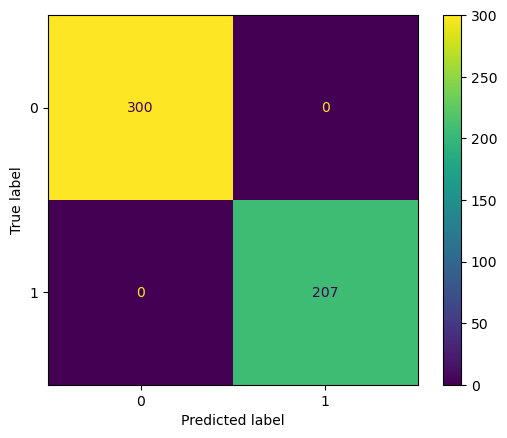

matrix for test : 



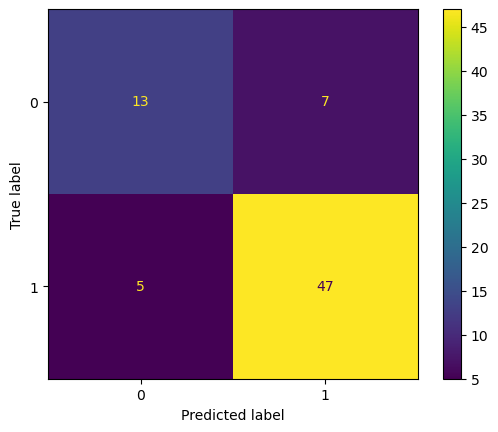

------------------------------


In [592]:
#save and load our model
#we evaluate and choose the best model which is random forest
#save
rf=RandomForestClassifier()
rf.fit(x_train , y_train)
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)
train_acc = accuracy_score(y_true=y_train , y_pred=y_train_pred)
test_acc = accuracy_score(y_true=y_test , y_pred=y_test_pred)
print("Training set pred accuracy : ",np.around(train_acc,2)* 100,'%' )
print("Test set  pred accuracy : ",np.around(test_acc,2)* 100,'%')
print("Classification report for training set : \n",print(classification_report(y_true=y_train, y_pred=y_train_pred, target_names=['No','Yes'], digits=4)))
print("Classification report for test set : \n",print(classification_report(y_true=y_test, y_pred=y_test_pred, target_names=['No','Yes'], digits=4)))    
print('matrix for train : \n')
ConfusionMatrixDisplay(confusion_matrix(y_true=y_train , y_pred=y_train_pred)).plot()
plt.show()
print('matrix for test : \n')
ConfusionMatrixDisplay(confusion_matrix(y_true=y_test , y_pred=y_test_pred)).plot()
plt.show()
print('-'*30)   
import pickle
pickle.dump(dt, open('model.pkl', 'wb'))

In [593]:
#reuse model and predict
#reuse the model
#load the model
pickled_model = pickle.load(open('model.pkl', 'rb'))